In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

Epoch 1/100
211/211 [==============================] - 2s 4ms/step - loss: 6819.2720 - val_loss: 534.5046
Epoch 2/100
211/211 [==============================] - 1s 3ms/step - loss: 576.2454 - val_loss: 301.0740
Epoch 3/100
211/211 [==============================] - 1s 3ms/step - loss: 195.3864 - val_loss: 178.1376
Epoch 4/100
211/211 [==============================] - 1s 3ms/step - loss: 130.1234 - val_loss: 168.2273
Epoch 5/100
211/211 [==============================] - 1s 3ms/step - loss: 103.8962 - val_loss: 142.8541
Epoch 6/100
211/211 [==============================] - 1s 3ms/step - loss: 89.3630 - val_loss: 145.5051
Epoch 7/100
211/211 [==============================] - 1s 3ms/step - loss: 79.4374 - val_loss: 122.8809
Epoch 8/100
211/211 [==============================] - 1s 3ms/step - loss: 70.2475 - val_loss: 134.2978
Epoch 9/100
211/211 [==============================] - 1s 4ms/step - loss: 63.9661 - val_loss: 115.6854
Epoch 10/100
211/211 [==============================] - 1s

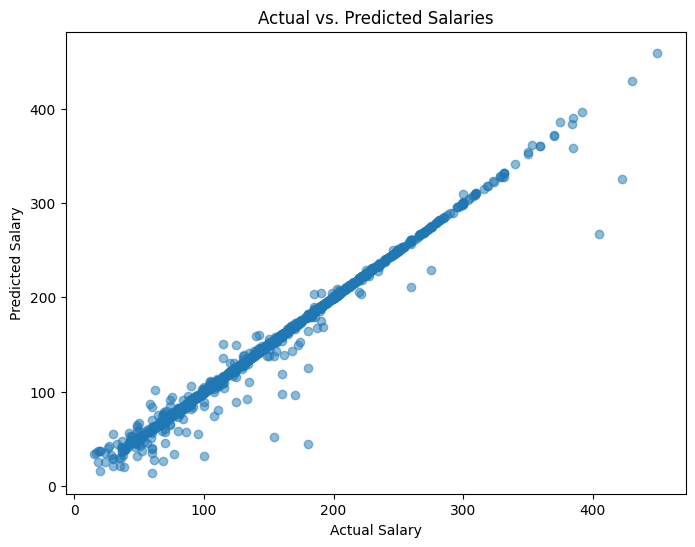

Mean Absolute Error: 2.1002770262636137
Mean Squared Error: 65.28393418219605
Root Mean Squared Error: 8.079847410823799
Top 10 Features: Index(['job_title_Machine Learning Engineer',
       'job_title_Business Intelligence Data Analyst',
       'job_title_Cloud Data Architect', 'job_title_Analytics Engineer',
       'job_title_Data Scientist', 'job_title_Data Infrastructure Engineer',
       'job_title_NLP Engineer', 'job_title_Data Quality Engineer',
       'job_title_Managing Director Data Science',
       'job_title_Data Science Tech Lead'],
      dtype='object')


In [14]:
# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Drop the 'salary_in_usd' column since we're ignoring it
# data.drop(columns=['salary_in_usd'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)
# Divide the 'salary' column by 1000
data['salary_in_usd'] /= 1000
# Separate features and target
X = data.drop(columns=['salary'])
y = data['salary_in_usd']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     # Dropout(0.2),
#     Dense(64, activation='relu'),
#     # Dropout(0.2),
#     Dense(1, activation='linear')
# ])
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(64, activation='relu'),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with a custom learning rate
# custom_learning_rate = 0.001  # Set your desired learning rate here
# model.compile(optimizer=Adam(learning_rate=custom_learning_rate), loss='mean_squared_error')
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Feature Importance
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the importance of features based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Top 10 features
top_features = feature_names[sorted_indices][:10]
print('Top 10 Features:', top_features)